# Sprocket Central Pty Ltd - Medium Size Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

### By (Ahmed Mohamed Sayed)

### What is Cohort and Cohort Analysis?
* A cohort is a collection of users who have something in common. A traditional cohort, for example, divides people by the week or month of which they were first acquired. When referring to non-time-dependent groupings, the term segment is often used instead of cohort.



- Cohort analysis is a descriptive analytics technique in cohort analysis. Customers are divided into mutually exclusive cohorts, which are then tracked over time.

- Vanity indicators don’t offer the same level of perspective as cohort research. It aids in the deeper interpretation of high-level patterns by supplying metrics around the product and consumer lifecycle.

###### Generally, there are two major types of Cohort:

1- **Time cohorts:** Customers who signed up for a product or service during a particular time frame  "the basis of the acquisition date".


2- **Behavior cohorts:** Customers who purchased a product or subscribed to service in the past.


###### However, we will be performing Cohort Analysis based on Time. Customers will be divided into acquisition cohorts depending on the month of their first purchase. The cohort index would then be assigned to each of the customer’s purchases, which will represent the number of months since the first transaction.



### Objectives:
1- Finding the percentage of active customers compared to the total number of customers after each month.


2- Interpret the Customer retention rate (CRR).


### 1-Data Loading, Cleaning & Wrangling:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb 
import numpy as np
import datetime as dt


In [2]:
df = pd.read_excel('KPMG.xlsx', 'Transactions')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# Checking data's info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# Counting missing values:
df.isnull().values.sum()

1542

In [5]:
# Replacing missing numerical values with mean :
df = df.fillna(df.mean())
# Counting the rest missing values ' Categorical':
df.isnull().values.sum()

<ipython-input-5-35c5f43768c0>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


788

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [7]:
# Filling missing categorical values with the most common value: 
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
# Checking df:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [8]:
# Make a copy from df :
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

### 2-Defining Cohorts :

#### Step 1:  
* Extract transaction year & month from transaction_date column to identify month for every transaction.
* Group customers & transaction month.
* Identify the first transaction.
###### The result is assigning aquisition month cohort for every customer

In [9]:
# Create function to extract month & year from tranaction column:
def get_month(x): return dt.datetime(x.year, x.month, 1)
# Create Invoice Month column using the previous function:
df1['Invoicemonth'] = df1['transaction_date'].apply(get_month)
# Grouping by customer id & select the invoice month value:
grouping = df1.groupby('customer_id')['Invoicemonth'] 
# Create Cohortmonth column be selecting the first transaction for every customer:
df1['Cohortmonth'] = grouping.transform('min')
df1.head()                                
                                

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Invoicemonth,Cohortmonth
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01


#### Step 2:  
* Extract transaction year & month 
* Extract cohort year & month.
* Calculate Difference in years & months to create cohort index (Diff between any transaction and the first transaction for each customer) . 
###### The result is creating a cohort index column that represents the month of each customers' transactions among months.

In [10]:
# Creat function to get  year,month& day int:
def get_date_int(df1, column):
    year = df1[column].dt.year
    month = df1[column].dt.month
    day = df1[column].dt.day
    return year, month, day

# Getting the integers for date parts from the `Invoicemonth` column
Invoice_year, Invoice_month, _ = get_date_int(df1, 'Invoicemonth')

# Getting the integers for date parts from the `Cohortminth` column
cohort_year, cohort_month, _ = get_date_int(df1, 'Cohortmonth')
# Calculate diffs between first tranaction & the rest to Create CohortIndex:
years_diff = Invoice_year - cohort_year
month_diff = Invoice_month - cohort_month
df1['cohort_index'] = years_diff * 12 + month_diff +1 # Adding +1 so that index will be starting from 1
df1.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Invoicemonth,Cohortmonth,cohort_index
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01-01,10



#### Step 3:  
* Calculate Daily Active Users (DAU) from each cohort. 
* Counting unique users from each cohort.
* Create Dataframe (pivotted table) with CohortMonth in the rows, CohortIndex in the columns, and customer_id counts as values. . 
###### The result is to create the main table for calculating CRR & other metrics.

In [11]:
# Extract DAU from each cohort:
grouping = df1.groupby(['Cohortmonth' , 'cohort_index'])

# Extract unique customers & reset index:
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data =cohort_data.reset_index()


# Create pivotted DF :
cohort_count = cohort_data.pivot( index='Cohortmonth',columns='cohort_index'
                                  ,values = 'customer_id')
cohort_count.round(1)


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
Cohortmonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3-Caclulating Customer Retention Rate (CRR) :

###### CRR measures how many customers from each of the cohort have returned in the subsequent months.  
* Using the dataframe called cohort_counts we will select the First columns(equals to total number of customer in cohorts)
* Calculate the ratio of how many of these customers came back in the subsequent months.
 

In [12]:
# Counting active cs from the first column that represents 100% of cs:
cohort_size = cohort_count.iloc[:,0]
# Calculate Retention rate :
crr = cohort_count.divide(cohort_size, axis=0)
crr.round(2)*100

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
Cohortmonth,,,,,,,,,,,,
2017-01-01,100.0,36.0,38.0,38.0,37.0,36.0,38.0,39.0,37.0,39.0,37.0,38.0
2017-02-01,100.0,41.0,37.0,39.0,36.0,37.0,38.0,35.0,41.0,38.0,37.0,NaN
2017-03-01,100.0,35.0,36.0,35.0,38.0,38.0,36.0,44.0,39.0,37.0,NaN,NaN
2017-04-01,100.0,33.0,36.0,46.0,43.0,36.0,42.0,38.0,39.0,NaN,NaN,NaN
2017-05-01,100.0,40.0,39.0,41.0,34.0,35.0,35.0,39.0,NaN,NaN,NaN,NaN
2017-06-01,100.0,37.0,36.0,39.0,38.0,38.0,43.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,34.0,38.0,42.0,48.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.0,41.0,33.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.0,30.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4-Visualizing Customer Retention Rate (CRR):

###### Heatmap is the best visual type for presenting CRR

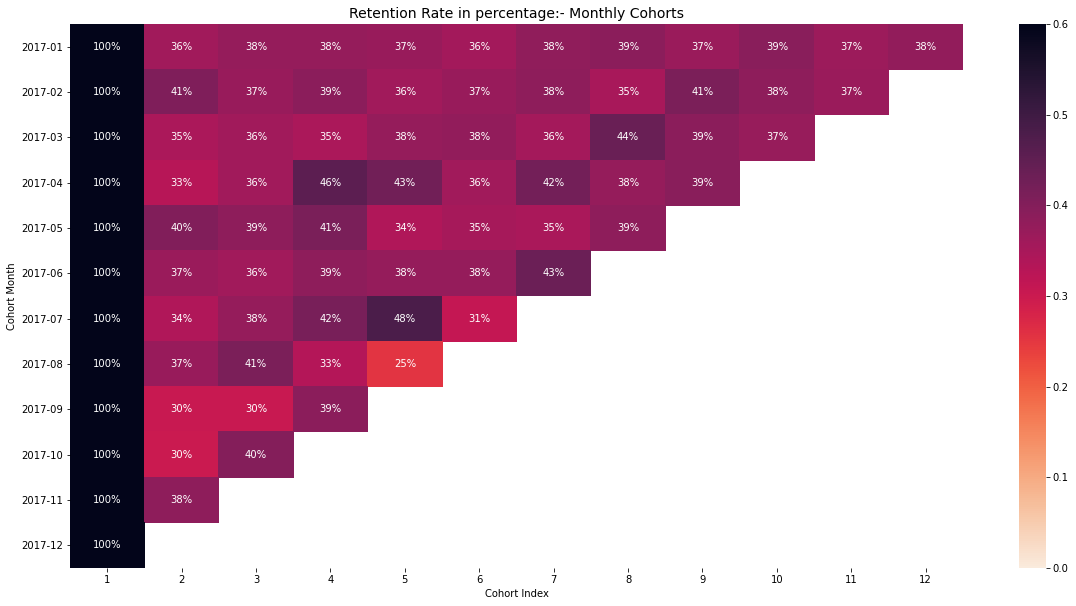

In [13]:
# reset index for retention:
crr.index = pd.to_datetime(crr.index).strftime('%Y-%m')
crr.index
# Plotting Cohort analysis "retention":
plt.figure(figsize=(20, 10))
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)
sb.heatmap(data=crr, annot=True, fmt= '.0%',cmap='rocket_r', vmin = 0.0 , vmax = 0.6)
plt.yticks(rotation=0) 
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index');

### 5- Interpreting the CRR:

[](22.PNG)

* 100% value in all cells in column 1 represents that this was the month when customer signed up or did their first transaction and have rate of 100% activity.

* The highlighted value of 48% means that  48% of the cohort that signed in July 2017 were active 5 months later.

![retention](crr1.PNG)



In [14]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [15]:
df['transaction_date'].min()

Timestamp('2017-01-01 00:00:00')

In [16]:
df['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [74]:
df['transaction_date'].dt.date
df['transaction_date'].astype(str)

0        2017-02-25
1        2017-05-21
2        2017-10-16
3        2017-08-31
4        2017-10-01
            ...    
19995    2017-06-24
19996    2017-11-09
19997    2017-04-14
19998    2017-07-03
19999    2017-09-22
Name: transaction_date, Length: 20000, dtype: object

In [75]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [73]:

snap = max('transaction_date')+ dt.timedelta(days=10)                            

TypeError: can only concatenate str (not "datetime.timedelta") to str

In [72]:
df['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')